In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:10px;}
</style>
"""))

<b><font size="6" color="red">Ch 11. 데이터프레임과 시리즈 (Pandas)</font><b>

# 1. Pandas 패키지
- 데이터 분석을 위해 반드시 알아야 할 패키지. NumPy 기반
- 다른 많은 라이브러리와 잘 통합되도록 설계됨.
- 2차원 구조를 갖는 데이터프레임, 1차원 구조를 갖는 시리즈를 제공
- Pandas 장점: 
    - 데이터프레임 생성, 파일io, 레이블링, 부분데이터 추출
    - 크기 변경(행이나 열 삽입, 삭제), 데이터 분할, 병합, 데이터 구조 변경, 결측치 처리
- https://pypi.python.org/pypi/pandas (package index)
- http://pandas.pydata.org/pandas-docs/stable/api.html (API reference)

In [2]:
import pandas as pd
pd.__version__

'1.5.3'

In [4]:
data = pd.read_json('data/ch09_member1.json', encoding='cp949') #기본 encoding utf-8
print(type(data))
display(data)

<class 'pandas.core.frame.DataFrame'>


,name,age,email,address
0,홍길동,20,hong@gd.com,서울
1,고길동,25,go@gd.com,부산
2,신길동,30,shin@gd.com,대전


In [6]:
member4 = pd.read_csv('data/ch09_member4.csv')
member4

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


In [9]:
member1 = pd.read_csv('data/ch09_member1.csv', header=None, names=['name', 'age', 'email', 'address'])
member1

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


# 2. 데이터프레임 만들기
## 2.1. 딕셔너리 리스트를 이용해서 데이터 프레임 만들기

In [10]:
d = [{'kor':100, 'mat':95}, {'kor':90, 'mat':99}]
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [12]:
df.to_dict() # 데이터프레임을 딕셔너리로 

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [13]:
df.to_numpy() # 데이터프레임을 넘파이배열
df.values    # 데이터프레임을 넘파이배열

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [14]:
df.dtypes # 열의 타입

kor    int64
mat    int64
dtype: object

In [15]:
df.info() # ★

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   kor     2 non-null      int64
 1   mat     2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [16]:
df['kor'].dtype

dtype('int64')

In [17]:
# 타입변경(열마다)
import numpy as np
df['kor'].astype(np.float64)
df['kor'] = df['kor'].astype('float64') # kor열의 타입을 float64로

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     2 non-null      float64
 1   mat     2 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


In [23]:
d = [{'kor':100, 'mat':95}, {'kor':90, 'mat':99}, {'kor':92, 'eng':99 }]
df = pd.DataFrame(data=d)
df

,kor,mat,eng
0,100,95.0,NaN
1,90,99.0,NaN
2,92,NaN,99.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      int64  
 1   mat     2 non-null      float64
 2   eng     1 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 200.0 bytes


In [25]:
type(np.nan) # np.nan 결측치

float

In [27]:
df['kor'] = df['kor'].astype('int32')
df

,kor,mat,eng
0,100,95.0,NaN
1,90,99.0,NaN
2,92,NaN,99.0


In [28]:
#결측치는 int로 형변환 불가(결측치를 대체 값으로 치환 후 변환)
#df['mat'] = df['mat'].astype('int32')

## 2.2. 리스트를 이용해서 데이터프레임 만들기

In [29]:
kor = [100, 90, 95, 90, 65]
mat = [99, 100, 95, 98, 94]
df = pd.DataFrame({'kor':kor, 'mat':mat})
df.head(2) #상위 2행만 출력

,kor,mat
0,100,99
1,90,100


In [30]:
df = pd.DataFrame(data=np.c_[kor, mat], columns=['국어', '수학'])
df

,국어,수학
0,100,99
1,90,100
2,95,95
3,90,98
4,65,94


In [31]:
df.shape

(5, 2)

In [35]:
l = [['트렌드 코리아 2026', '김난도', 18000, 10], 
    ['사탄탱고', '라슬로', 17820, 10],
    ['미술관 여행자', '카미유 주노', 29700, 10]]
df = pd.DataFrame(l, columns=['책이름', '저자', '가격', '할인율'])
df

,책이름,저자,가격,할인율
0,트렌드 코리아 2026,김난도,18000,10
1,사탄탱고,라슬로,17820,10
2,미술관 여행자,카미유 주노,29700,10


In [36]:
# %ls : ipython 매직명령어
# !dir : 쉘 명령어

In [39]:
%ls "C:\ai\downloads\상가정보\상가정보"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A014-DCD6

 C:\ai\downloads\상가정보\상가정보 디렉터리

2025-10-12  오후 03:33    <DIR>          .
2025-10-12  오후 03:33    <DIR>          ..
2025-04-27  오후 11:07             1,011 [필독]파일열람방법.txt
2025-04-27  오후 11:07        61,227,944 소상공인시장진흥공단_상가(상권)정보_강원_202503.csv
2025-04-27  오후 11:07       356,572,082 소상공인시장진흥공단_상가(상권)정보_경기_202503.csv
2025-04-27  오후 11:07        93,472,559 소상공인시장진흥공단_상가(상권)정보_경남_202503.csv
2025-04-27  오후 11:07        76,425,275 소상공인시장진흥공단_상가(상권)정보_경북_202503.csv
2025-04-27  오후 11:07        40,070,868 소상공인시장진흥공단_상가(상권)정보_광주_202503.csv
2025-04-27  오후 11:07        61,715,005 소상공인시장진흥공단_상가(상권)정보_대구_202503.csv
2025-04-27  오후 11:07        41,491,092 소상공인시장진흥공단_상가(상권)정보_대전_202503.csv
2025-04-27  오후 11:07        84,550,600 소상공인시장진흥공단_상가(상권)정보_부산_202503.csv
2025-04-27  오후 11:07       294,549,483 소상공인시장진흥공단_상가(상권)정보_서울_202503.csv
2025-04-27  오후 11:07         9,303,432 소상공인시장진흥공단_상가(상권)정보_세종_202503.csv
2025-04-27  오후 11:07        28,457,489 소상공인시장진흥공단_상가(상

In [43]:
df = pd.read_csv(r"C:\ai\downloads\상가정보\상가정보\소상공인시장진흥공단_상가(상권)정보_서울_202503.csv",
                encoding = 'utf-8', sep=',', #기본값, 생략 가능
                nrows=70) #처음 70행만 가져오기
df.shape

(70, 39)

In [44]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.98184,37.58625


In [48]:
#Pandas Display Option
pd.options.display.max_columns = 39 # 39열까지 디스플레이. 기본값 20
pd.options.display.max_rows = 70 # 70행까지 디스플레이. 기본값 60

In [50]:
df.head(1).T

,0
상가업소번호,MA010120220800000033
상호명,부동산임대김은숙
지점명,NaN
상권업종대분류코드,I2
상권업종대분류명,음식
상권업종중분류코드,I212
상권업종중분류명,비알코올
상권업종소분류코드,I21201
상권업종소분류명,카페
표준산업분류코드,I56229


## 2.3. read_csv

In [52]:
#help(pd.read_csv)
pd.read_csv?

In [54]:
#(1) CSV 파일 불러오기(기본값)
member = pd.read_csv('data/ch11_member.csv'
                    #, encoding='utf-8', sep=',', comment주석처리X
                    )
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [58]:
# 문자형으로 읽어들인 Birth를 datetime형으로
# 형변환 : astype('타입'), astype('datetime64')-비추, to_datetime()함수
# member['Birth'].astype('datetime64') 비추
member['Birth'] = pd.to_datetime(member['Birth'])
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [59]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     6 non-null      object        
 1   Age      6 non-null      int64         
 2   Email    6 non-null      object        
 3   Address  6 non-null      object        
 4   Birth    6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 368.0+ bytes


In [60]:
member['Age'] = member['Age'].astype(np.int16)
member.dtypes

Name               object
Age                 int16
Email              object
Address            object
Birth      datetime64[ns]
dtype: object

In [61]:
#(2) 특정행을 제외하고 csv 파일 읽어오기
member = pd.read_csv('data/ch11_membercp949.csv', encoding='cp949', skiprows=[1,6]) #1,6번째 행 제외하고 읽어오기
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [62]:
#(3) 상위 몇 행만 sep 문자는 콤마(,) 아닌 csv 파일 읽어오기
member = pd.read_csv('data/ch11_membersep.csv', 
                     nrows = 5, #상위 5행만
                    sep='|')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [65]:
#(4) 주석(#) 제외, datetime형 필드를 지정하여 csv 파일 읽어오기
member = pd.read_csv('data/ch11_membertab.csv', 
                     sep='\t', #구분자
                     comment='#',#주석 제외 처리 
                     parse_dates=['Birth']) #datetime64형으로 읽어올 필드 지정
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


## 2.4. 패키지에서 가져오기 : iris 데이터
- iris 가져오기 방법1: sklearn(머신러닝 패키지)
- 방법2: statsmodels (R 데이터)
- 방법3: seaborn(시각화 패키지)
### 2.4.1. iris 가져오는 방법 1 : sklearn
- sklearn.datasets 모듈 데이터(iris)를 데이터프레임으로 변환 (본래 데이터프레임x, 딕셔너리x)

In [71]:
from sklearn import datasets # 머신러닝을 공부하기 위한 학습 데이터셋 제공
#sklearn 패키지에서 제공되는 데이터셋은 딕셔너리형식으로 제공
iris = datasets.load_iris()
#iris.get('data')
#print(type(iris)) #Bunch 타입(딕셔너리로부터 상속받은 타입) 딕셔너리처럼 동작
#print(iris.DESCR) #iris 데이터셋의 설명
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [72]:
iris.data #독립변수
iris['data'][:3] #상위 3행

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [73]:
#데이터프레임의 열이름 (비추)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
#데이터프레임의 열이름 (추천)
[col[:-5].replace(' ', '_') for col in iris.feature_names]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [81]:
iris.target # ML/DL 학습 시 타겟변수(종속변수)
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [82]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [83]:
iris.target_names[iris.target] #데이터프레임에 쓸 타겟변수(대개 가장 오른쪽 열)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [84]:
data = iris.data
target = iris.target_names[iris.target].reshape(-1, 1)
print(data[:3], target[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] [['setosa']
 ['setosa']
 ['setosa']]


In [85]:
print('독립변수 shape :', data.shape)
print('타겟변수 shape :', target.shape)

독립변수 shape : (150, 4)
타겟변수 shape : (150, 1)


In [88]:
#1. 독립변수와 종속변수를 stack한 후 데이터프레임으로
df = pd.DataFrame(np.hstack((data, target)),
                 columns=iris.feature_names + ['species'])
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa


In [94]:
#df.species # 가능
#df.sepal length (cm) # 사용 불가
#df['sepal length (cm)'] # 가능
df.columns = [col[:-5].replace(' ','_') for col in iris.feature_names] + ['species']
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [95]:
df.sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: object

In [96]:
#2. 독립변수, 종속변수를 따로 데이터프레임으로 생성 → 두 데이터프레임을 연결
X = pd.DataFrame(iris.data,
                columns = [col[:-5].replace(' ','_') for col in iris.feature_names])
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [97]:
y = pd.DataFrame(iris.target_names[iris.target], columns=['species'])
y.head(1)

,species
0,setosa


In [98]:
print('X의 shape: ', X.shape)
print('y의 shape: ', y.shape)
print('X의 index: ', X.index)
print('y의 index: ', y.index)

X의 shape:  (150, 4)
y의 shape:  (150, 1)
X의 index:  RangeIndex(start=0, stop=150, step=1)
y의 index:  RangeIndex(start=0, stop=150, step=1)


In [101]:
iris_df = pd.concat( [X, y], axis=1 ) #두 데이터프레임을 열로 연결
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [102]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 2.4.2. iris 가져오는 방법 2 : statsmodels

In [5]:
# R 패키지의 기본 데이터 가져오기
from statsmodels.api import datasets
iris_dataset = datasets.get_rdataset('iris',
                          package='datasets',
                          cache=True) #한번 다운로드한 데이터를 pc에 캐시 저장
iris_dataset

<class 'statsmodels.datasets.utils.Dataset'>

In [6]:
iris = iris_dataset.data
iris.head() #상위 5행

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris['Species']
iris.Species
#iris['Sepal.Length']
#iris.Sepal.Length # 열 이름에 .이 있으면 접근 불가

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [9]:
iris.columns = [col.replace('.','_').lower() for col in iris.columns]
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


### 2.4.3. iris 가져오는 방법 3 : seaborn

In [11]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [15]:
# 데이터 프레임을 파일로 출력 (4kb)
iris.to_csv('data/ch11_iris.csv',
           sep = ',', encoding='utf-8', #utf-8 기본값
           index=False) #행이름(인덱스 넘버) 생략하고 파일 출력

In [17]:
iris.to_csv('data/ch11_iris.csv.gz', #889B
           index=False,
           compression = 'infer') #파일 확장자에 맞게 압축

In [18]:
import pandas as pd
#read_iris = pd.read_csv('data/ch11_iris.csv')
read_iris = pd.read_csv('data/ch11_iris.csv.gz', compression='infer')
read_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


# 3. 이름 지정하기 (열/행)
## 3.1. 열 이름 지정하기

In [55]:
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [56]:
member.columns = ['이름', '나이', '메일', '주소', '생일']
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 3.2. 행 이름 지정하기

In [57]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [53]:
member.index = range(11, 16)
member

대분류  기본정보                        추가정보           
소분류)   이름  나이             메일       주소         생일
11    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
12    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
13    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
14    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
15    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [59]:
member.index = ['일', '이', '삼', '사', '오']
member

,이름,나이,메일,주소,생일
일,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
이,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
삼,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
사,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
오,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [60]:
member.loc['일', '이름']

'홍길동'

In [31]:
# member1을 수정하려면 (1) 할닫=
member1 = member.set_index('이름')
member1.head(1)

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [61]:
member.set_index('이름', inplace=True)

In [62]:
member

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [63]:
member.index

Index(['홍길동', '홍길서', '홍길남', '홍길북', '홍길중'], dtype='object', name='이름')

In [64]:
#인덱스를 컬럼으로 편입시키기
member.reset_index(inplace=True)

In [65]:
member.index=[0, 1, 2, 0, 1]
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
0,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
1,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [66]:
#기존 index를 새로운 열에 편입시키지 않고 제거한 후, 새로운 숫자 index로 초기화
#member.index = range(len(member))
member = member.reset_index(drop=True)
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [67]:
#datetime 열에서 날짜 및 시간에 관련된 정보를 추출 : 시리즈.dt
member['생일'].dt.year

0    1999
1    1999
2    1999
3    1999
4    1999
Name: 생일, dtype: int64

In [68]:
member['생일'].dt.weekday

0    4
1    2
2    0
3    5
4    5
Name: 생일, dtype: int64

## 3.3. 레이블 이름 지정

In [69]:
print(member.columns)
print(member.columns.name)

Index(['이름', '나이', '메일', '주소', '생일'], dtype='object')
None


In [70]:
member.columns.name='정보'
member

정보,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [80]:
member.columns = [['기본정보', '기본정보', '기본정보', '추가정보', '추가정보'], ['이름', '나이', '메일', '주소', '생일']]
member.columns.names = ['대분류', '소분류']
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소         생일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [76]:
member.index = [['좌우', '좌우', '상하', '상하', '상하'],['동', '서', '남', '북', '중']]
member.index.names = ['레벨1', '레벨2']
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소         생일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [79]:
member.loc[('상하','중'),'기본정보'] #1차원

소분류
이름             홍길중
나이              23
메일    mid@hong.com
Name: (상하, 중), dtype: object

In [77]:
member.loc[('상하','북'),('기본정보','이름')]

'홍길북'

In [78]:
member.loc['상하', '기본정보']

소분류,이름,나이,메일
레벨2,,,
남,홍길남,21,nam@hong.com
북,홍길북,22,buk@hong.com
중,홍길중,23,mid@hong.com


# 4. 부분 데이터 조회

In [83]:
member = pd.read_csv('data/ch11_member.csv', comment='#', parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1. 단일 열 조회

In [84]:
member['Name']
member.Name

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [ ]:
# member[0] # 행이름으로 []로 조회할 경우 에러

In [85]:
member[['Name','Address']]

,Name,Address
0,홍길동,서울시 강동구
1,홍길서,서울시 중구
2,홍길남,서울시 강동구
3,홍길북,서울시 관악구
4,홍길중,부산시 중구


## 4.2. loc을 이용한 조회
- df.loc[행이름, 열이름] : 행이름, 열이름으로 조회
    * 행이름과 열이름 자리에 슬라이싱 from : to → from부터 to까지(포함)
    * 행이름과 열이름 자리에 리스트

In [88]:
member.loc[0:2]
member.loc[0:2,]
member.loc[0:2, :]
member.loc[0:2, ...]
member.loc[:2]
#모든 열을 다 출력할 경우 열 생략 가능

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [89]:
member.index = ['동','서','남','북','중']
member.loc['동':'남']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [90]:
member.loc['동':'남', 'Name':'Address'] #동~남행, Name~Address열

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [91]:
#동,남 행 / Name, Email, Address 열
member.loc[['동','남'], ['Name','Email','Address']]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [94]:
member.loc[:, 'Name']

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

## 4.3. iloc을 이용한 조회
- df.iloc[행 순번, 열 순번] : 행 순번, 열 순번으로 조회
    * 행 순번과 열 순번 자리에 슬라이싱 from:to:by → from부터 to 앞까지(미포함)
    * 행 순번과 열 순번 자리에 리스트

In [95]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [100]:
#동~남 행, 모든 열
member.iloc[:3]
member.iloc[0:3]
member.iloc[0:3,]
member.iloc[0:3, :]
member.iloc[0:3, ...]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [103]:
#0번째 행
print(member.iloc[0])
print(type(member.iloc[0]))

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object
<class 'pandas.core.series.Series'>


In [104]:
#동~남 행, name(0)~Address(3)열
member.iloc[:3, :4]
member.iloc[:3, :-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [105]:
#짝수 번째 행의 마지막 열을 제외하고 출력
member.iloc[::2, :-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [106]:
#마지막 행부터 첫 행까지 거꾸로 출력
member.iloc[::-1]

,Name,Age,Email,Address,Birth
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [98]:
#동행, 남행, name(0), Email(2), Address(3)
member.iloc[[0,2], [0,2,3]]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [99]:
#Name열
member.iloc[:,0]

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

## 4.4. 조건으로 조회하기

In [107]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [108]:
member['Name'] == '홍길남'

동    False
서    False
남     True
북    False
중    False
Name: Name, dtype: bool

In [110]:
#Name이 홍길남인 행을 모두 출력
member[member['Name']=='홍길남']
member.loc[member['Name']=='홍길남']
#member.loc[False, False, True, False, False]

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [132]:
#Name이 홍길남인 이름과 나이, Email 출력
member.loc[member['Name']=='홍길남', 'Name':'Email']

,Name,Age,Email
남,홍길남,21,nam@hong.com


In [127]:
# 23세 이상의 데이터 전체 조회
member.loc[member['Age'] >= 23]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [126]:
# 23세 이상의 Name, Age, Email
member.loc[member['Age'] >= 23, 'Name':'Email']

,Name,Age,Email
서,홍길서,30,seo@hong.com


In [128]:
# 23세 이상의 Name, Age, Address
member.loc[member['Age'] >= 23, ['Name', 'Age', 'Address']]

,Name,Age,Address
서,홍길서,30,서울시 중구
중,홍길중,23,부산시 중구


In [130]:
# ~ : 반대 의미
member[~(member['Age']>=23)]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [134]:
address = '서울시 관악구'
print('서울시로 시작 여부: ', address.startswith('서울시'))
print('중구 포함 여부: ', address.find('중구')!=-1)

서울시로 시작 여부:  True
중구 포함 여부:  False


* 시리즈에 문자함수를 쓰기 위해 참조
* https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [136]:
member['Address'].str.startswith('서울')

동     True
서     True
남     True
북     True
중    False
Name: Address, dtype: bool

In [137]:
#주소가 서울시로 '시작'
member[member['Address'].str.startswith('서울')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [139]:
#주소가 중구를 '포함' (방법1)
member[member['Address'].str.find('중구')!=-1]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [140]:
#주소가 중구를 '포함' (방법2)
member[member['Address'].str.contains('중구')]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [142]:
#시리즈.isin([리스트])
#이름이 홍길동이거나 홍길남인 데이터
member[member['Name'].isin(['홍길동', '홍길남'])]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [145]:
#이름이 홍길동이거나 홍길남인 데이터의 이름, 주소, 생일
member.loc[member['Name'].isin(['홍길동', '홍길남']),['Name','Address','Birth']]

,Name,Address,Birth
동,홍길동,서울시 강동구,1999-01-01
남,홍길남,서울시 강동구,1999-11-01


In [146]:
#2000년 이전에 태어난 데이터
member[member['Birth'].dt.year < 2000]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [152]:
#조건 연산자를 이용해서 추출(조건 2개)
data = pd.DataFrame({'eng': [np.nan, 80, np.nan, 85], 
                     'kor': [100, 80, 60, np.nan]})
display(data)
#영어 80점 이상이고 국어 80점 이상인 데이터 추출
data[(data['eng'] >= 80) & (data['kor'] >= 80)]

,eng,kor
0,NaN,100.0
1,80.0,80.0
2,NaN,60.0
3,85.0,NaN


,eng,kor
1,80.0,80.0


In [154]:
#결측치 확인 방법 1
data.info()
#entries와 non-null count 차이

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   eng     2 non-null      float64
 1   kor     3 non-null      float64
dtypes: float64(2)
memory usage: 192.0 bytes


In [155]:
#결측치 확인 방법 2
data.isna() #결측치 여부

,eng,kor
0,True,False
1,False,False
2,True,False
3,False,True


In [156]:
True + True + False

2

In [159]:
data.isna().sum() # 각 열의 결측치 개수

eng    2
kor    1
dtype: int64

※데이터프레임의 부분 데이터 조회 방법
- df[열이름] : 특정 열 조회
- df[조건] : 조건에 맞는 모든 행 조회
- df.loc[행이름, 열이름]
    - 행이름, 열이름 자리에 슬라이싱, 리스트 가능
    - 열이름 생략하면 모든 열 출력
    - 행이름 자리에 조건
- df.iloc[행순번, 열순번]
    - 행순번, 열순번 자리에 슬라이싱, 리스트 가능
    - 열순번 생략하면 모든 열 출력

### 데이터프레임 조건 추출 Quiz

In [165]:
from statsmodels.api import datasets
iris_dataset = datasets.get_rdataset('iris',
                                    package='datasets',
                                    cache=True)
iris = iris_dataset.data
iris.columns = [col.replace('.','_').lower() for col in iris.columns]
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [175]:
# 1. sepal_length 열만 출력
iris['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [171]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.iloc[:11,:-1]
iris.loc[0:10, iris.columns[:-1]]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [181]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.iloc[3:11,[0,2]]

,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


In [182]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.iloc[[0,50,100]]
iris.loc[[0:100:50]]
iris.iloc[[0:101:50]]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [187]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.iloc[[0,25,50,75,100,125],2:4]
iris.iloc[0:126:25,'petal_length':'petal_width']
iris.loc[0:125:25,2:-1]

,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


In [188]:
# 6. species가 versicolor인 데이터의 모든 열
iris[iris['species']=='versicolor']

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [190]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris[iris['species']=='setosa'].head(5)
iris[iris['species']=='setosa'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [191]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris['sepal_length']>=6.5].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor


In [196]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris['sepal_length']>=7.2, 'sepal_length':'petal_length']

,sepal_length,sepal_width,petal_length
105,7.6,3.0,6.6
107,7.3,2.9,6.3
109,7.2,3.6,6.1
117,7.7,3.8,6.7
118,7.7,2.6,6.9
122,7.7,2.8,6.7
125,7.2,3.2,6.0
129,7.2,3.0,5.8
130,7.4,2.8,6.1
131,7.9,3.8,6.4


In [198]:
# 10. versicolor종 중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris[(iris['species'] == 'versicolor') & (iris['sepal_length'] > 6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [199]:
import numpy as np

In [200]:
#괄호 처리 생략하는 대체용 함수
iris[np.logical_and(iris['species'] == 'versicolor', iris['sepal_length'] > 6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


# 5. 데이터 삭제 및 추가
## 5.1. 데이터프레임의 요소 삭제
df.drop(label, axis)
- axis=0이면 행 삭제 / axis=1이면 열 삭제
- label : 열 이름 또는 행(인덱스) 이름
- inplace = True : 데이터 영구 삭제, return None. (default False, return)

In [201]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [202]:
#1. 단일 행 삭제
member.drop('중', axis=0) 
#삭제한 결과를 member에 반영하려면
#(1) 할당 member = member.drop('중', axis=0)
#(2) member.drop('중', axis=0, inplace=True)

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [203]:
#2. 복수 행 삭제
member.drop(['동','서','중']) 

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [204]:
#3. 단일 열 삭제
member.drop(['Name', 'Email'], axis=1)

,Age,Address,Birth
동,20,서울시 강동구,1999-01-01
서,30,서울시 중구,1999-12-01
남,21,서울시 강동구,1999-11-01
북,22,서울시 관악구,1999-05-01
중,23,부산시 중구,1999-01-30


## 5.2. 데이터 프레임의 요소 추가

In [205]:
#1. 열 추가
member['nickname'] = '귀요미'
member

,Name,Age,Email,Address,Birth,nickname
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,귀요미
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,귀요미
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,귀요미
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,귀요미
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,귀요미


In [206]:
#2. 리스트를 이용한 열 추가
member['favorite_no'] = [3, 2, 7, None, 12]
#숫자와 함께 None을 넣으니, 결측치로 처리
member

,Name,Age,Email,Address,Birth,nickname,favorite_no
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,귀요미,3.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,귀요미,2.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,귀요미,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,귀요미,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,귀요미,12.0


In [210]:
#3.새로운 열에 결측치 할당 후 원하는 데이터 재할당
#member['favorite_num'] = None : NaN으로 처리되지 않음
member['favorite_num'] = np.nan
member.iloc[::2, -1] = 7
member

,Name,Age,Email,Address,Birth,nickname,favorite_no,favorite_num
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,귀요미,3.0,7.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,귀요미,2.0,NaN
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,귀요미,7.0,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,귀요미,NaN,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,귀요미,12.0,7.0


In [213]:
#좀 줄여 놓고
member.drop(['Email', 'Birth', 'favorite_no', 'favorite_num'], axis=1, inplace=True)

In [214]:
member

,Name,Age,Address,nickname
동,홍길동,20,서울시 강동구,귀요미
서,홍길서,30,서울시 중구,귀요미
남,홍길남,21,서울시 강동구,귀요미
북,홍길북,22,서울시 관악구,귀요미
중,홍길중,23,부산시 중구,귀요미


In [216]:
#4. 딕셔너리로 행 추가
new_member = pd.DataFrame([{'Name':'홍길숙', 'Age':30, 'Address':'경기도 안양시', 'nickname':'덜렁이'}])
new_member

,Name,Age,Address,nickname
0,홍길숙,30,경기도 안양시,덜렁이


In [219]:
member = pd.concat( [member, new_member]).reset_index(drop=True) # 두 데이터 프레임 연결
member

,Name,Age,Address,nickname
0,홍길동,20,서울시 강동구,귀요미
1,홍길서,30,서울시 중구,귀요미
2,홍길남,21,서울시 강동구,귀요미
3,홍길북,22,서울시 관악구,귀요미
4,홍길중,23,부산시 중구,귀요미
5,홍길숙,30,경기도 안양시,덜렁이
6,홍길숙,30,경기도 안양시,덜렁이


# 6. 병합과 연결
## 6.1. merge()를 이용한 데이터프레임 병합

In [220]:
df1= pd.DataFrame({'key':['a','b','c','d'],
                  'c1':[1,2,3,4]})
df1

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4


In [223]:
df2= pd.DataFrame({'key':['a','b','c','e'],
                  'c2':[10,20,30,40]})
df2

,key,c2
0,a,10
1,b,20
2,c,30
3,e,40


In [224]:
df1.merge(df2)
#inner join(양쪽이 다 일치하는 데이터만 병합) 
#how='inner' 기본값 

,key,c1,c2
0,a,1,10
1,b,2,20
2,c,3,30


In [225]:
df1.merge(df2, how='left') #왼쪽의 df1 데이터는 모두 남기고 오른쪽 df2가 매칭되도록

,key,c1,c2
0,a,1,10.0
1,b,2,20.0
2,c,3,30.0
3,d,4,NaN


In [226]:
df1.merge(df2, how='right') #오른쪽의 df2 데이터는 모두 남기고 왼쪽 df1이 매칭되도록

,key,c1,c2
0,a,1.0,10
1,b,2.0,20
2,c,3.0,30
3,e,NaN,40


In [227]:
df1.merge(df2, how='outer') #양쪽 데이터를 모두 남김.

,key,c1,c2
0,a,1.0,10.0
1,b,2.0,20.0
2,c,3.0,30.0
3,d,4.0,NaN
4,e,NaN,40.0


In [230]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','e'],
                  'c2':[10,20,30,40]})
df3.merge(df4, left_on='key3', right_on='key4', how='inner')

,key3,c1,key4,c2
0,a,1,a,10
1,b,2,b,20
2,c,3,c,30


## 6.2. concat()을 이용한 데이터프레임 연결
- pd.concat( [df1, df2, ...], axis)
    * axis=0 (기본값) : 위아래로 연결
    * axis=1 : 좌우로 연결

In [229]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','e'],
                  'c2':[10,20,30,40]})
#좌우 연결
pd.concat([df3, df4], axis=1)

,key3,c1,key4,c2
0,a,1,a,10
1,b,2,b,20
2,c,3,c,30
3,d,4,e,40


In [231]:
df3 = pd.DataFrame({'key':['a','b','c','d'],
                   'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key':['a','b','c','e'],
                  'c1':[10,20,30,40]})
pd.concat([df3, df4]).reset_index(drop=True)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,10
5,b,20
6,c,30
7,e,40


# 7. 정렬(행 이름, 열 이름, 값에 의한 정렬)
- df.sort_index(axis) : 행 또는 열 이름으로 정렬
- df.sort_values(by=[정렬기준 열 이름], ascending=T/F, inplace=T/F) : 특정 열 값에 의한 정렬 

In [232]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1. 행 이름으로 정렬하기

In [234]:
#인덱스를 정렬하는 셈
member.sort_index(axis=0)
#ascending = True (기본값) / inplace=True

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.2. 열 이름으로 정렬하기

In [235]:
#컬럼들을 정렬하는 셈
member.sort_index(axis=1)

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3. 값에 의한 정렬

In [239]:
#Age 기준 오름차순 정렬
member.sort_values('Age')
#member.sort_values(by='Age')
#member.sort_values('Age', ascending=False) #내림차순

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01


In [242]:
#Age 기준 오름차순, Age 값 동일 데이터 있을 시, Birth 기준 내림차순 정렬
member.loc[:, 'Age'] = [20,20,30,30,30]
member.sort_values(by=['Age', 'Birth'], ascending=[True, False])

,Name,Age,Email,Address,Birth
서,홍길서,20,seo@hong.com,서울시 중구,1999-12-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,30,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,30,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,30,mid@hong.com,부산시 중구,1999-01-30


# 8. 기초 통계 분석
    - Pandas는 기초 통계(데이터 요약), statmodels: 난이도 있는 통계
    - Pandas 제공 기초 함수들은 NaN 제외하고 계산됨.
- count: 데이터 수
- min : 최소값
- max : 최대값
- sum : 합계
- mean : 평균
- var : 분산
- std : 표준편차
- median : 중위값
- quantile : 분위수(0사분위수==최소값, 1사분위수, 2사분위수(중위값), 3사분위수, 4사분위수==최대값)
    * 이상치 구하는 용도 : Q1 - 1.5xIQR ~ Q3 + 1.5xIQR 이외의 데이터는 이상치
- describe : 요약통계량
- cumsum : 누적합
- cumprod : 누적곱
- cov: 공분산
- corr : 상관관계(계수)
- rolling(n).mean() : n개씩 평균 출력 - 데이터 변동이 많은 경우, 추세(패턴)를 부드럽게 보고 싶을 때 사용

In [2]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
134,6.1,2.6,5.6,1.4,virginica


## 8.1. min, max, ...

In [4]:
iris.min() #열별 최소값 (axis=0)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [5]:
iris.max()

sepal_length          7.9
sepal_width           4.4
petal_length          6.9
petal_width           2.5
species         virginica
dtype: object

In [9]:
iris.median(axis=0, numeric_only=True) #str열(species) 때문에 에러 발생하니, 숫자 필드만 계산하도록 지정

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [10]:
X = iris.iloc[:,:-1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
X.mean() # 열별 평균 == 행들의 평균 (axis=0)

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [12]:
X.mean(axis=1)
X.mean(axis='columns') # 행별 평균 == 행을 고정하고, 열들의 평균

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [15]:
import pandas as pd
df = pd.DataFrame(data = [1, 3, 4, 7, 10], columns = ['value'])
#interporlation='nearest' :  정확한 구간의 값이 없을 경우, 가장 가까운 값 출력
df['value'].quantile(q = [0, 0.25, 0.5, 0.75, 1], interpolation='nearest')

0.00     1
0.25     3
0.50     4
0.75     7
1.00    10
Name: value, dtype: int64

In [17]:
#interpolation='midpoint' : 정확한 구간의 값이 없을 경우, 계산해서 출력
df['value'].quantile(q = [0, 0.33, 0.5, 0.67, 1], interpolation='midpoint')

0.00     1.0
0.33     3.5
0.50     4.0
0.67     5.5
1.00    10.0
Name: value, dtype: float64

In [19]:
X.quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='nearest')

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


In [24]:
quant = X.quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='nearest')
for idx, col in enumerate(quant.columns):
    min_ = quant.iloc[0, idx]
    Q1 = quant.iloc[1, idx]
    Q3 = quant.iloc[3, idx]
    max_ = quant.iloc[4, idx]
    iqr = Q3 - Q1
    lower_outlier = Q1 - 1.5*iqr #하한 이상치 limit
    upper_outlier = Q3 + 1.5*iqr #상한 이상치 limit
    print(f"{idx} 번째 {col} 결과 → ", end='')
    print("하한 이상치 여부 : {}, 상한 이상치 여부 :{}".format(min_<lower_outlier, max_>upper_outlier))

0 번째 sepal_length 결과 → 하한 이상치 여부 : False, 상한 이상치 여부 :False
1 번째 sepal_width 결과 → 하한 이상치 여부 : True, 상한 이상치 여부 :True
2 번째 petal_length 결과 → 하한 이상치 여부 : False, 상한 이상치 여부 :False
3 번째 petal_width 결과 → 하한 이상치 여부 : False, 상한 이상치 여부 :False


<Axes: >

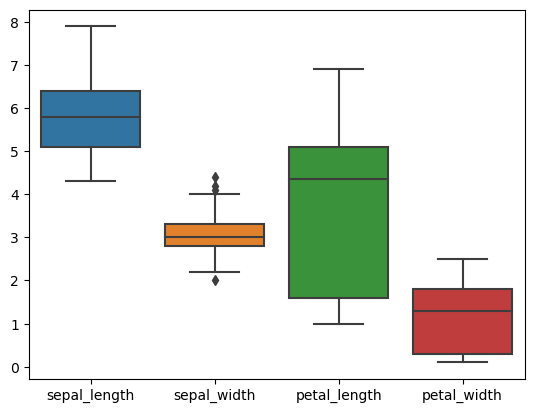

In [25]:
#상자수염그림(box plot) - 시각화 교안 p.21
import seaborn as sns
sns.boxplot(data=iris)
#위로부터 / 상한 이상치 limit or max_, q3, q2, q1, 하한 이상치 limit or min_ / 데이터가 있는 범위에서만 선을 긋는다.

In [28]:
iris['sepal_length'].rolling(5).mean()[:25] #인접한 (5)개의 평균

0      NaN
1      NaN
2      NaN
3      NaN
4     4.86
5     4.92
6     4.86
7     4.92
8     4.88
9     4.86
10    4.86
11    4.90
12    4.86
13    4.84
14    5.02
15    5.08
16    5.20
17    5.26
18    5.54
19    5.40
20    5.34
21    5.28
22    5.18
23    5.06
24    5.00
Name: sepal_length, dtype: float64

## 8.2. 요약통계량
- describe()

In [29]:
#1. 기본 요약 통계량
iris.describe() #기본값 : 숫자열에서의 요약통계량

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
iris['species'].describe()
iris.species.describe()
#문자열에서의 요약 통계량 : 데이터 개수, 종류, 최빈데이터, 최빈데이터 개수

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [32]:
#2. describe()의 include와 exclude 매개변수
df = pd.DataFrame({'a':[1, 2, 3,]* 2,
                  'b':[2.1, 4]* 3,
                 'c':['aaa','aaa','bbb','ccc','ddd','eee'],
                 'd':[True, False]*3})
df

,a,b,c,d
0,1,2.1,aaa,True
1,2,4.0,aaa,False
2,3,2.1,bbb,True
3,1,4.0,ccc,False
4,2,2.1,ddd,True
5,3,4.0,eee,False


In [33]:
df.describe() #숫자열만 기본 요약 통계량 출력

,a,b
count,6.000000,6.000000
mean,2.000000,3.050000
std,0.894427,1.040673
min,1.000000,2.100000
25%,1.250000,2.100000
50%,2.000000,3.050000
75%,2.750000,4.000000
max,3.000000,4.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [36]:
#include 매개 변수 통해서, 요약 통계량 출력할 타입 지정
df.describe(include=['float64', 'bool', 'object'])

,b,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,3.050000,NaN,NaN
std,1.040673,NaN,NaN
min,2.100000,NaN,NaN
25%,2.100000,NaN,NaN
50%,3.050000,NaN,NaN
75%,4.000000,NaN,NaN


In [37]:
df.describe(include='all') # 모든 타입의 열의 요약 통계량 출력

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,5,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,2,3
mean,2.000000,3.050000,NaN,NaN
std,0.894427,1.040673,NaN,NaN
min,1.000000,2.100000,NaN,NaN
25%,1.250000,2.100000,NaN,NaN
50%,2.000000,3.050000,NaN,NaN
75%,2.750000,4.000000,NaN,NaN


In [38]:
#exclude 매개변수를 이용해서 기본 통계량 출력에서 제외할 타입 지정
df.describe(exclude='float64')

,a,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,2.000000,NaN,NaN
std,0.894427,NaN,NaN
min,1.000000,NaN,NaN
25%,1.250000,NaN,NaN
50%,2.000000,NaN,NaN
75%,2.750000,NaN,NaN


In [39]:
df['c'].unique() # 특정 컬럼의 고유값들의 종류

array(['aaa', 'bbb', 'ccc', 'ddd', 'eee'], dtype=object)

In [40]:
df['c'].value_counts() #빈도

aaa    2
bbb    1
ccc    1
ddd    1
eee    1
Name: c, dtype: int64

## 8.3. 공분산/상관계수

In [41]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [43]:
X.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


https://matplotlib.org/stable/users/explain/colors/colormaps.html colormap (시각화 교안 p.21)

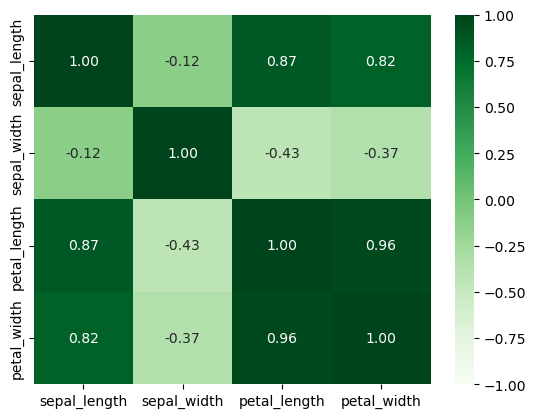

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='Greens')
plt.show()